# 리코챗 로봇
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/169199)

In [1]:
# bfs에 사용할 큐
qu_l = []
# 맵을 저장할 리스트
map_l = []

# 미끄러짐 이동 함수 px, nx, py, ny
def go_px(x,y):
    global map_l
    while True:
        if x == len(map_l)-1: break
        if map_l[x+1][y] == 'D': break
        x += 1
    return x, y

def go_nx(x,y):
    global map_l
    while True:
        if x == 0: break
        if map_l[x-1][y] == 'D': break
        x -= 1
    return x, y

def go_py(x,y):
    global map_l
    while True:
        if y == len(map_l[x])-1: break
        if map_l[x][y+1] == 'D': break
        y += 1
    return x, y

def go_ny(x,y):
    global map_l
    while True:
        if y == 0: break
        if map_l[x][y-1] == 'D': break
        y -= 1
    return x, y

# 이동 후 처리 함수
def post_move(_x,_y,x,y) -> bool:
    global qu_l, map_l
    # 이동한 위치가 .이라면, 원래 위치 + 1을 저장
    if map_l[_x][_y] == '.': 
        map_l[_x][_y] = map_l[x][y] + 1
        qu_l.append([_x,_y])
    # 이동한 위치가 G라면, True를 반환
    elif map_l[_x][_y] == 'G':
        map_l[_x][_y] = map_l[x][y] + 1
        return True


def solution(board):
    global qu_l, map_l
    # 미끄러짐 이동 함수를 리스트에 저장
    go_funcs = [go_px, go_nx, go_py, go_ny]
    start = [0, 0]
    
    for i in range(len(board)):
        # 맵을 리스트형식으로 변환
        # 시작점과 도착점의 좌표를 저장
        board[i] = list(board[i])
        if 'R' in board[i]:
            start[0] = i
            start[1] = board[i].index('R')
            
    # 맵을 전역변수에 저장
    map_l = board
    # 현재 위치를 큐에 저장
    qu_l.append(start)
    # 현재 위치를 방문했다고 표시
    map_l[start[0]][start[1]] = 0

    while True:
        # 큐가 비어있지만 도착점에 도착하지 못했다면, -1을 반환
        if len(qu_l) == 0: return -1

        # 현재 위치를 큐에서 꺼냄
        c_p = qu_l.pop(0)
        
        # 현재 위치에서 네방향 미끄러짐 이동
        # 이동 후 처리는 post_move 함수에서 함
        # post_move 함수는 도착점에 도착하면 True를 반환 -> 해당 값(이동 횟수)을 반환
        for go in go_funcs:
            _p = go(*c_p)
            if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        
    return 

In [2]:
solution(["...D..R", ".D.G...", "....D.D", "D....D.", "..D...."])

7

# 성공
- 가져온 문제
- BFS(너비우선탐색) 알고리즘을 사용하여 성공
- 이동 함수들을 리스트에 넣어 사용.
- 코드가 조금이나마 간결해짐.

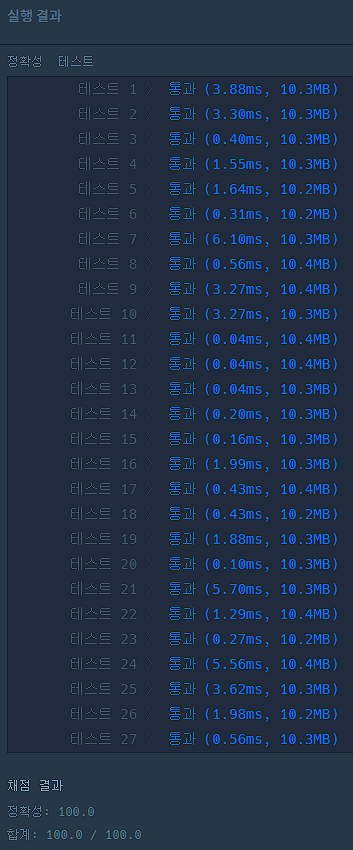

# 신규 아이디 추천
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/72410)

# 신규 아이디 추천
[문제 링크]()

# 신규 아이디 추천
[문제 링크]()